<a href="https://colab.research.google.com/github/btlgs2000/dl_intro/blob/master/nn_tensorflow_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
t = [1, 2, 3, 4, 5]

In [ ]:
t = tf.convert_to_tensor(t)

In [ ]:
t

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 2, 3, 4, 5], dtype=int32)>

In [ ]:
type(t)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
t.shape

TensorShape([5])

In [ ]:
t2 = tf.convert_to_tensor([1,2, 3, 4, 5])

In [ ]:
t + t2

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([ 2,  4,  6,  8, 10], dtype=int32)>

In [ ]:
t2.numpy()

array([1, 2, 3, 4, 5], dtype=int32)

In [ ]:
np.max(t)

5

In [ ]:
tf.reduce_max(t, axis=0, )

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [ ]:
a = np.array([1, 2, 3, 4, 5])

In [ ]:
a[0] = 0

In [ ]:
a

array([0, 2, 3, 4, 5])

In [ ]:
a_tf = tf.convert_to_tensor(a)

In [ ]:
a_tf[0] = 10

TypeError: ignored

In [ ]:
a_tf = tf.Variable(initial_value=a, dtype=tf.float32)

In [ ]:
a_tf.assign([10, 11, 12, 13, 14])

<tf.Variable 'UnreadVariable' shape=(5,) dtype=int64, numpy=array([10, 11, 12, 13, 14])>

In [ ]:
a_tf

<tf.Variable 'Variable:0' shape=(5,) dtype=int64, numpy=array([10, 11, 12, 13, 14])>

In [ ]:
a_tf[0].assign(2)

<tf.Variable 'UnreadVariable' shape=(5,) dtype=int64, numpy=array([ 2, 11, 12, 13, 14])>

In [ ]:
a_tf

<tf.Variable 'Variable:0' shape=(5,) dtype=int64, numpy=array([ 2, 11, 12, 13, 14])>

In [ ]:
t

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 2, 3, 4, 5], dtype=int32)>

In [ ]:
tf.reduce_sum(a_tf * tf.cast(t, tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=54.0>

In [ ]:
t = tf.cast(t, tf.float32)
with tf.GradientTape() as tape:
    # tape.watch(t)
    scalar_product = tf.reduce_sum(a_tf * t)

grad = tape.gradient(scalar_product, a_tf)

In [ ]:
grad

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 2., 3., 4., 5.], dtype=float32)>

In [ ]:
import tensorflow as tf

In [ ]:
tf.convert_to_tensor(np.array([1., 2, 3, 4, 5]), dtype=tf.float32)

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 2., 3., 4., 5.], dtype=float32)>

In [ ]:
type(_)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
var = tf.Variable(initial_value=[1, 2, 3], dtype=tf.float32, name='a')

In [ ]:
var

<tf.Variable 'a:0' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [ ]:
var.assign([2, 3, 4])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

In [ ]:
var.assign_add([1, 1, 1])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([3., 4., 5.], dtype=float32)>

In [ ]:
var[0].assign(6)

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([6., 4., 5.], dtype=float32)>

In [ ]:
var.trainable

True

In [ ]:
t = tf.convert_to_tensor([1, 2, 3], dtype=tf.float32)

In [ ]:
with tf.GradientTape() as tape:
    sum_ = tf.reduce_sum(var*t)

grad = tape.gradient(sum_, var)

In [ ]:
grad

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [ ]:
with open('filename', 'w'):
    # scrittura sul file

In [ ]:
class Callable:
    def __call__(self):
        print('Sono chiamabile')

In [ ]:
c = Callable()

In [ ]:
c()

Sono chiamabile


In [ ]:
class ContextManager:
    def __enter__(self):
        print('inizializzazione')

    def __exit__(self, exception_type, exception_value, traceback):
        print('chiusura')

In [ ]:
import time

with ContextManager():
    time.sleep(5)

inizializzazione
chiusura


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
X = np.random.rand(10_000, 2)
y = 2*X[:, 0] + 3*X[:, 1] - 1

In [2]:
import tensorflow.keras.datasets as datasets
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
X_train = tf.cast(X_train, dtype=tf.float32)
X_test = tf.cast(X_test, dtype=tf.float32)

In [4]:
class Mlp:
    def __init__(self, units_list, with_softmax=False):
        '''
        args
        ----

        units_list: lista con il numero di unità per layer
                    [784, 100, 100, 10]
        with_softmax: se l'ultimo starto è seguito da una softmax
        '''
        self.Ws = []
        self.bs = []
        self.with_softmax = with_softmax

        # creazione dei pesi
        for in_units, out_units in zip(units_list[:-1], units_list[1:]):
            # (784, 100)
            W = tf.Variable(initial_value=np.random.normal(size=(in_units, out_units)), shape=[in_units, out_units], dtype=tf.float32)
            b = tf.Variable(initial_value=np.zeros(shape=(out_units,)), shape=[out_units], dtype=tf.float32)
            self.Ws.append(W)
            self.bs.append(b)

    def __call__(self, x):
        '''
        args
        ----
        x: x.shape==(n_batch, n_features)

        ret
        ---
        y: y.shape==(n_batch, n_out)
        '''
        *W_hidden, W_last = self.Ws
        *b_hidden, b_last = self.bs
        # ciclo sui layer nascosti
        for W, b in zip(W_hidden, b_hidden):
            # W.shape = (n_in, n_out)
            # x.shape = (n_batch, n_in)
            x = x@W + b
            
            # applica sigmoide
            x = tf.math.sigmoid(x)

        # ultimo layer
        y = x@W_last + b_last

        if self.with_softmax:
            y = tf.math.softmax(y)

        return y

In [5]:
mlp = Mlp(units_list=[784, 100, 100, 10], with_softmax=True)

In [6]:
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

In [9]:
from tqdm import tqdm

epochs = 10
alpha = 1e-3
batch_size = 32
# regressione lineare

n = 60_000

pbar = tqdm()
for epoch in range(epochs):
    # X @ theta(vett colonna) + b = y_pred
    for idx in range(0, n, batch_size):
        # estrazione del batch
        # x_b.shape = (batch_size, 28, 28), y_b.shape = (batch_size,)
        x_b, y_b = X_train[idx:idx+batch_size], y_train[idx:idx+batch_size]

        with tf.GradientTape() as tape:
            # (batch_size, 28, 28) -> (batch_size, 784)
            x_b_reshaped = tf.reshape(x_b, shape=[batch_size, 28*28])

            # y_pred.shape = (batch_size, 10)
            y_pred = mlp(x_b_reshaped)
            cce = tf.keras.losses.CategoricalCrossentropy()
            # la loss media sugli elementi del batch
            loss = cce(y_b, y_pred)
        pbar.set_description(f'loss={loss.numpy().item()}:2f')
        # Ws_grad = [W1_grad (784, 100), W2_grad (100, 100), W3_grad (100, 10)]
        # bs_grad = [b1_grad (100), b2_grad (100), b3_grad (10)]
        Ws_grad, bs_grad = tape.gradient(loss, [mlp.Ws, mlp.bs])
        for W, W_grad, b, b_grad in zip(mlp.Ws, Ws_grad, mlp.bs, bs_grad):
            # step di gradient descent
            # W = W - alpha*W_grad
            W.assign_sub(alpha*W_grad)
            b.assign_sub(alpha*b_grad)


loss=2.7207536697387695: : 0it [01:24, ?it/s]

KeyboardInterrupt: ignored

In [11]:
for idx in range(0, 1000, 32):
    print(idx)

0
32
64
96
128
160
192
224
256
288
320
352
384
416
448
480
512
544
576
608
640
672
704
736
768
800
832
864
896
928
960
992


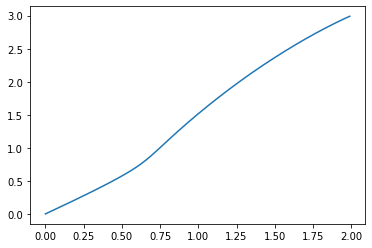

In [ ]:
theta1 = [theta[0] for theta in thetas]
theta2 = [theta[1] for theta in thetas]
plt.plot(theta1, theta2)

In [ ]:
b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.9906266>

In [ ]:
theta

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([1.9911435, 2.9911177], dtype=float32)>